In [1]:
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import shuffle

# %matplotlib inline

import logging as LG

# LG.basicConfig(level=LG.DEBUG,
#                     format=' %(message)s %(levelname)',
#                     )


lg = LG.getLogger("python-ajupyter")

N=100_000
Default_val = 100

In [2]:
def setup(quant: int, val: int) -> np.array:
    return np.full(quant, val)

In [3]:
def simple_returns(quant=None, retmax=10, ret=None, whole=True) -> np.array:
    """half makes profit of ret and half loses ret (percentage)
    :ret float to indicate max profit, so >= 0"""
    if ret is None:
        if whole:
            ret = np.random.randint(0,retmax)
        else:
            ret = np.random.uniform(0,retmax)
    lg.debug("ret: " + str(ret) +" %")
    return np.concatenate((np.full(quant//2, 1+(ret/100)), np.full(quant//2, 1-(ret/100))))


In [11]:
def simulateSimple(init=None, shuffleOn=True, iterations=10,graph=False, cumulative=False,retmax=10, ret=None, whole=True):
    original = iterations
    if init is None:
        init = setup(N, Default_val)
    result = [init]
    while iterations > 0:
        lg.debug(f"iteration {original - iterations +1}")
        iterations -= 1
        
        simpleret = simple_returns(len(init),retmax, ret, whole)
        if shuffleOn:
            shuffle(simpleret)
        comb = np.multiply(init, simpleret)
        lg.debug("after multiplying: " + str(comb))
        result.append(comb)
        init = comb
        
    draw_graph(result, cumulative=cumulative)
    return result

(None, None)

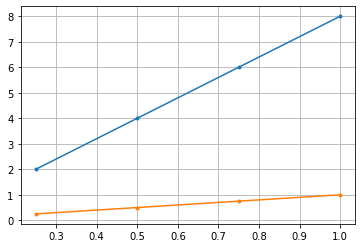

In [28]:
def draw_graph(data: np.array(np.array), cumulative=False, log=False, fmt=".-", grid=True):
#     fig, ax = plt.subplots()
    
    for i in data:
        lg.debug("presort " + str(i))
        i.sort()
        if cumulative:
            og=i
            cumulated = np.cumsum(i)
            i = np.divide(cumulated, cumulated[-1])
            lg.debug(f"postsort (cumulated={cumulative} (og {og} \ncumulated{cumulated}\ni {i} -- {cumulated[-1]})) ")
        
        plt.grid(True) if grid else plt.grid(False)
        plot_in = ([x/len(i) for x in range(1,len(i)+1)],i, fmt)
        if log:
            plt.loglog(*plot_in)
        else:
            plt.plot(*plot_in)
        break
# lg.setLevel(LG.CRITICAL)
lg.setLevel(LG.DEBUG)

# draw_graph([[1,2,3]], cumulative=True)
draw_graph([[2,4,6,8]], cumulative=False),draw_graph([[2,2,2,2]], cumulative=True), #draw_graph([[4,5,6]])

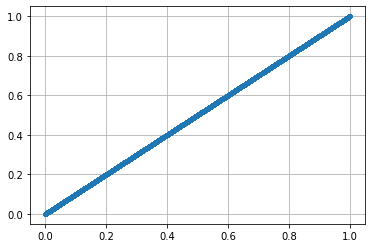

In [18]:
a = simulateSimple(iterations=20,graph=True, cumulative=True)

In [ ]:
np.random.uniform(0,1,2)
print(*enumerate([1,2,3]))

In [ ]:
np.full(10//2, 1+(10/100))

In [ ]:
a = [1,2,3,4]
shuffle(a)

In [ ]:
print(np.sort(a), a.sort())

In [ ]:
b = np.array((1,2,3,4,5))
su = np.cumsum(b)
su

In [ ]:
np.divide(su,su[-1]),su[-1]

In [ ]:
f = np.divide([1,2,3],[1,3,6])
f, f[2]

In [ ]:
lg.warning("dfsaf")

lg.debug("dfsaf")
print("fdsafds")

In [ ]:
lg.getEffectiveLevel()
lg.

In [ ]:
a = np.array([1,2,3,4,5])
shuffle(a)
a

In [ ]:
lg.debug(a)

In [ ]:
np.cumsum(a)

In [ ]:
lg.callHandlers